<a href="https://colab.research.google.com/github/TatarinovaEM758/Machine_learning/blob/main/ML_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Деревья решений
# Цель работы
Научиться применять модель дерева принятия решений для задач классификации и регрессии.

Содержание работы
1. Cгенерируйте данные для задачи классификации на три класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 100 наблюдений. Визуализируйте их на диаграмме рассеяния.
2. Обучите модель классификационного решающего дерева sklearn.svm.DecisionTreeClassifier глубины 4 и критерием entropy.
3. Визуализируйте соответствующий граф дерева решений.
4. Визуализируйте полученные разделяющие области.
5. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
6. Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум некоторой функции. Визуализируйте их на диаграмме рассеяния.
7. Обучите модель регрессионного решающего дерева sklearn.svm.DecisionTreeRegressor глубиной 3.
8. Визуализируйте соответствующий граф дерева решений.
9. Визуализируйте получившуюся кусочную линию регрессии.
10. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
# Методические указания
Задача классификации
По аналогии с предыдущими работами, создадим и визуализируем датасет

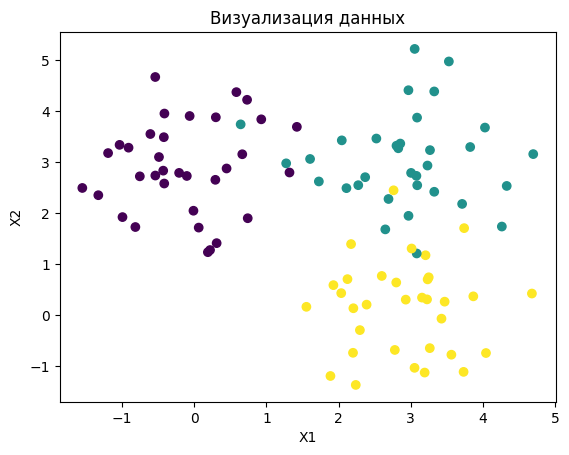

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

RANDOM_SEED = 42  # Задайте значение для RANDOM_SEED

X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                   n_features=2, random_state=RANDOM_SEED,
                   cluster_std=(0.9,0.9,0.9))

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Видим набор данных из трех классов:



Также, как и перцептрон, деревья решений могут легко применяться к задачам разной размерности. Количество классов не играет роли для дерева. Содадим и обучим модель:

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Определение переменных
depth = 4
RANDOM_SEED = 42

# Пример данных
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([0, 1, 0, 1])

# Обучение модели
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                   random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Здесь мы задаем вид функции, которая будет использоваться для нахождения оптимальной границы разбиения выборки. По умолчанию используется критерий Джини, а мы сейчас будем использовать критерий информационной энтропии. Также мы задает максимальную глубину дерева. Дерево не будет "расти" дальше этого количества уровней. Вы самостоятельно можете изменить значения этих параметров и проанализировать, как это повлияет на рабоут модели.

После обучения данной модели мы можем вывести собственно само дерево решений, то есть полное внутреннее устройство модели. Для этого в объекте существует специальный метод plot_tree():

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X, y)

tree.plot_tree(clf_tree)
plt.show()

В этом объекте есть еще один метод визуализации дерева - втекстовом виде. Самостоятельно найдите и примените его. А использованный нами метод выводит дерево в графическом виде:



Проинтерпретируйте изображенную на этом графике информацию.

Теперь можно визуализировать сами границы принятия решений:

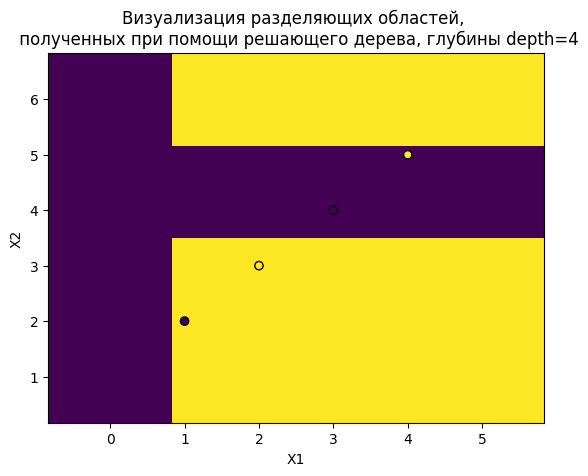

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Мы видим очень характерную для деревьев форму границы:



Как всегда оценим качество работы модели и с помощью метрик:

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[2 0]
 [0 2]]
Accuracy = 1.0
F1_score = 1.0


In [ ]:
[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99

Мы видим, что модель допустила всего одну ошибку на 100 примерах, что довольно неплохо. Но увеличив глубину дерева можно еще повысить его эффективность и добиться абсолютной точности.

Теперь создадим новое наблюдение:

In [ ]:
observation_new = [[2, 1]]

И классифицируем его:

In [ ]:
clf_tree.predict(observation_new)

array([1])

Визуализируем на графике его вместе с границей принятия решений:



Задача регрессии
Сгенерируем простой датасет для задачи регрессии. Для этого получим 100 упорядоченных случайных чисел, а затем значения целевой переменной вычислим как результат какой-нибудь функции (например возьмем экспоненту) и прибавим к результату случайный шум, для имитации разброса:

In [ ]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

Мы получим примерно такой датасет для парной регрессии (линия здесь добавлена только для информации и наглядности, она не является частью данных):



Создадим объект регрессора на основе деревьев решений и обучим его:

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

   # Генерация случайных данных
X = np.random.rand(100, 2)  # 100 образцов, 2 признака
y = np.random.rand(100)      # 100 целевых значений

   # Параметры модели
RANDOM_SEED = 42
depth = 3

   # Создание и обучение дерева решений
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

Выведем полученное дерево:



Самостоятельно проинтерпретируйте информацию в этом графе. А мы построим линию регрессии на графике::

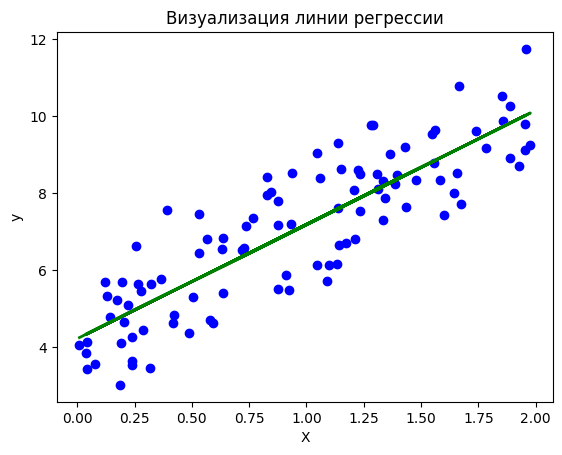

In [ ]:
import numpy as np
    # Генерация случайных данных
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

    # Предположим, что y_pred_reg - это предсказания регрессии
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred_reg = model.predict(X)
import matplotlib.pyplot as plt

    # Построение графиков
plt.scatter(X, y, c="b")
plt.plot(X, y_pred_reg, "g", lw=2)
plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


Опять видим характерную кусочно-линейную линию:



Тпереь как всегда оценим качество работы модели:

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Пример истинных и предсказанных значений
y = np.array([3, -0.5, 2, 7])
y_pred_reg = np.array([2.5, 0.0, 2, 8])

# Расчет метрик
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9486081370449679
MSE=  0.375


In [ ]:
r2=  0.9559340585697235
MSE=  0.010347452773751169

Данные метрики свидетельствуют о довольно точной работе модели. Лишь на графике открывается определенная условность и неглабкость полученных предсказаний. Давайте создадим новое предсказание:

In [ ]:
observation_new = [[0.7]]

И изобразим его на графике:



Самостоятельно подвигайте данную точку. Обратите внимание, что есть участки, где небольшое изменение положения точки не изменяет результат предсказания.

# Задания для самостоятельного выполнения
1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.
2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.
3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.
4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.
5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.
6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.
7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.
8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.
9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

### 1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

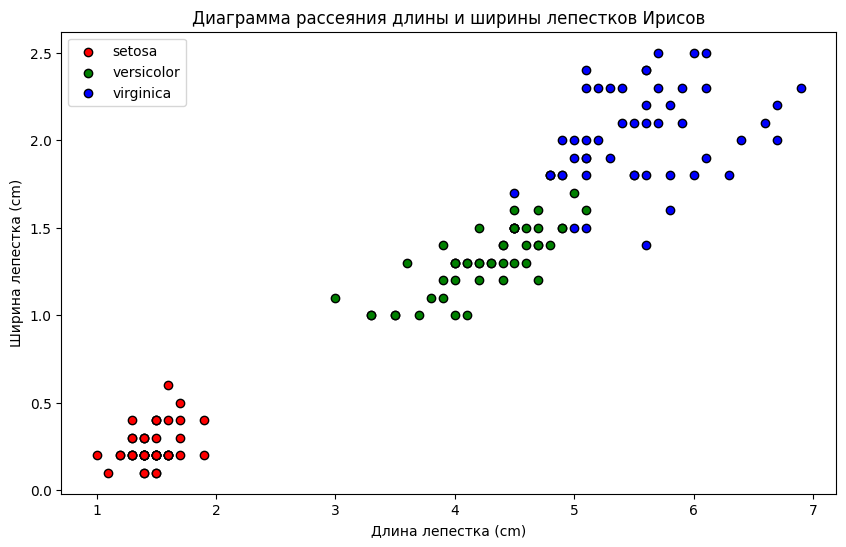

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Загружаем данные Ирисов
iris = load_iris()
X = iris.data[:, 2:4]  # берем только длину и ширину лепестков
y = iris.target  # целевые классы

# Определяем цвета для каждого класса
colors = ['red', 'green', 'blue']
class_labels = iris.target_names

# Создаем диаграмму рассеяния
plt.figure(figsize=(10, 6))
for i in range(len(class_labels)):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=class_labels[i], edgecolors='k')

plt.title('Диаграмма рассеяния длины и ширины лепестков Ирисов')
plt.xlabel('Длина лепестка (cm)')
plt.ylabel('Ширина лепестка (cm)')
plt.legend()
plt.show()

### 2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

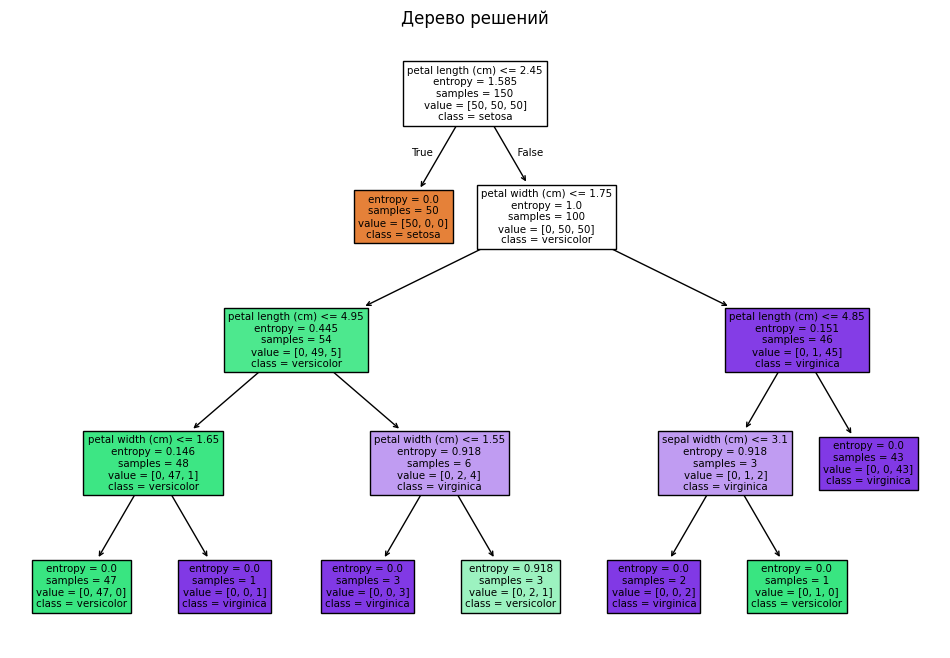

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Загрузка набора данных (например, Ирисы Фишера)
iris = load_iris()
X, y = iris.data, iris.target

# Создание и обучение дерева решений с глубиной 4
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
clf.fit(X, y)

# Визуализация дерева
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Дерево решений")
plt.show()

### 3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

In [ ]:
pip install matplotlib numpy scikit-learn

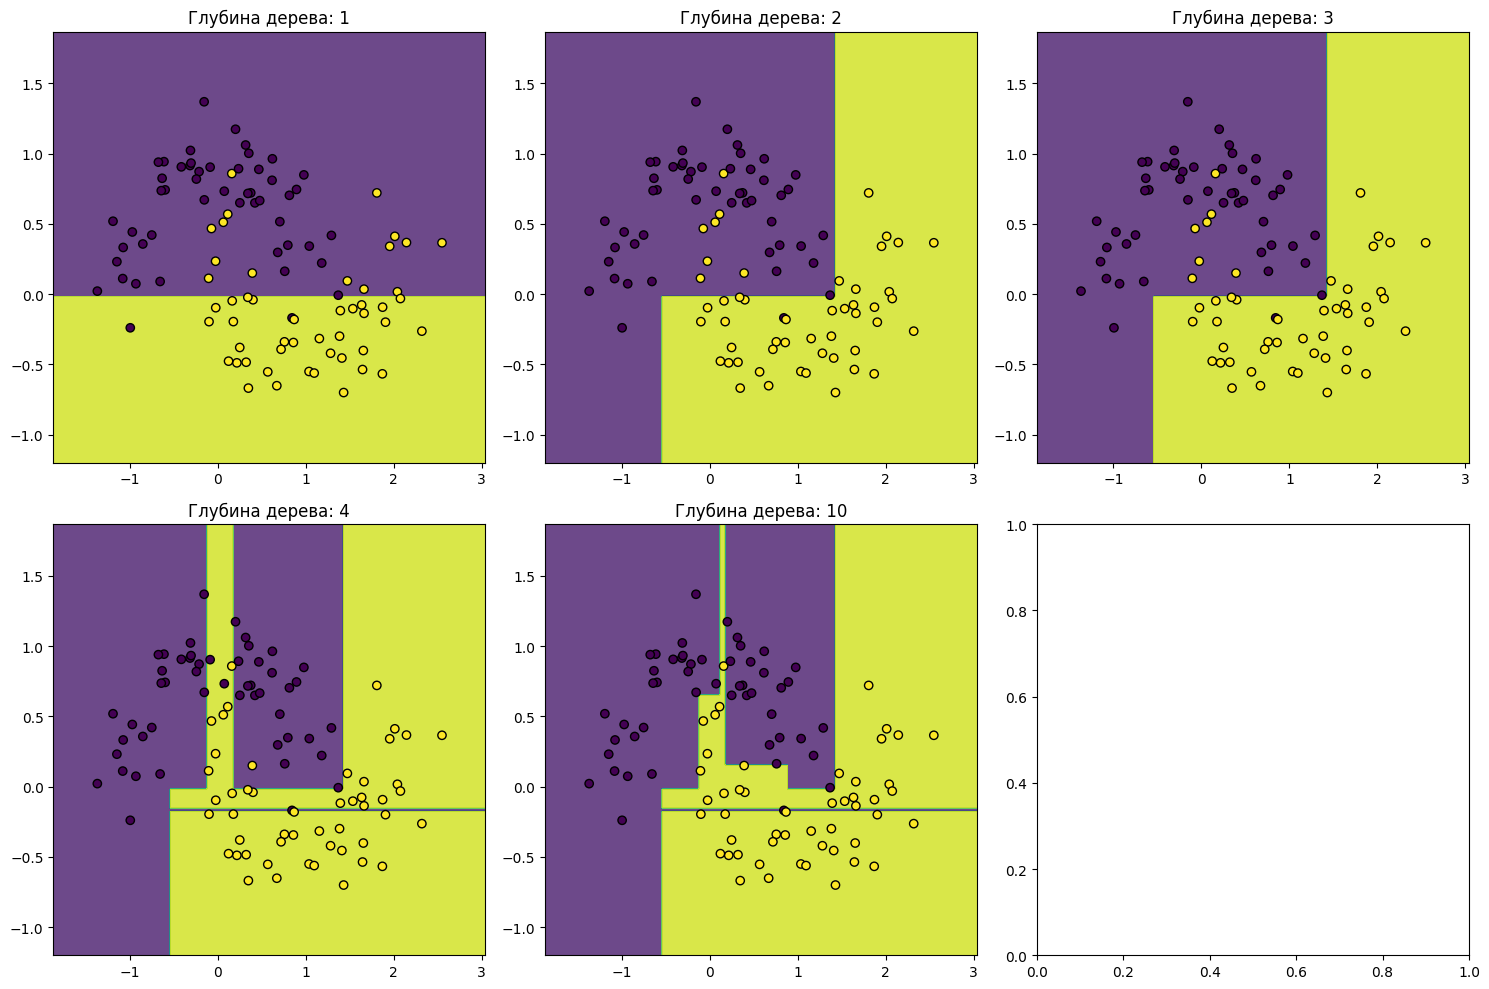

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

# Создание данных
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Определение глубин дерева
depths = [1, 2, 3, 4, 10]

# Настройка карты для визуализации
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Обучение модели и визуализация разделяющих областей
for i, depth in enumerate(depths):
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    clf.fit(X, y)

    # Настройка границ для визуализации
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Предсказание по всей сетке
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(f"Глубина дерева: {depth}")

# Упрощение визуализации
plt.tight_layout()
plt.show()

### 4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

Для оценки работы моделей с разными глубинами, можно использовать набор метрик, которые помогут проанализировать их производительность. Вот основные метрики, которые стоит учитывать:

1. *Точность (Accuracy)*: Доля правильно классифицированных объектов к общему числу объектов.
   \ text{Accuracy} = frac{text{TP} + text{TN}}{text{TP} + text{TN} + text{FP} + text{FN}} \
   где TP — истинно положительные, TN — истинно отрицательные, FP — ложно положительные, FN — ложно отрицательные.

2. *Полнота (Recall)*: Доля истинно положительных объектов к числу всех положительных объектов.
   \ text{Recall} = frac{text{TP}}{text{TP} + text{FN}} \

3. *Точность (Precision)*: Доля истинно положительных объектов к числу всех объектов, предсказанных как положительные.
   \ text{Precision} = frac{text{TP}}{text{TP} + text{FP}} \

4. *F1-мера*: Гармоническое среднее между точностью и полнотой, полезна в случаях несбалансированных данных.
   \ text{F1} = 2 cdot frac{text{Precision} cdot text{Recall}}{text{Precision} + text{Recall}} \

5. *ROC-AUC*: Площадь под кривой ROC (Receiver Operating Characteristic). Это мера, показывающая способность модели различать классы. Значения варьируются от 0 до 1, где 1 означает идеальную классификацию.

6. *Матрица путаницы (Confusion Matrix)*: Позволяет визуализировать, сколько объектов было правильно и неправильно классифицировано по каждому классу.

7. *Время обучения и предсказания*: Важные метрики, если производительность и скорость модели критичны.

### Сравнение моделей

После вычисления всех этих метрик для моделей с разными глубинами, можно сделать выводы о том, какая из них лучше:

- Если одна из моделей показывает значительно более высокие значения точности и F1-меры, это указывает на то, что она лучше справляется с задачей классификации.
- Обратите внимание на полноту и точность: если одна модель имеет высокую полноту, но низкую точность (или наоборот), это может быть важным фактором в зависимости от того, какое из этих свойств более критично для вашей задачи.
- ROC-AUC также следует учитывать, особенно при сравнении моделей с различными порогами классификации.

### Вывод

На основе вышеизложенного, вывод о том, какая модель лучше классифицирует данные, будет зависеть от конкретных значений метрик. Если одна модель показывает наилучшие результаты по большинству метрик, а также сбалансированность между полнотой и точностью, то она будет считаться предпочтительной для данной задачи. Не забудьте учитывать также время обучения и предсказания при выборе модели.

### 5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.


In [ ]:
pip install numpy pandas scikit-learn matplotlib graphviz

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz

# Загрузка датасета Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение классификатора
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = clf.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


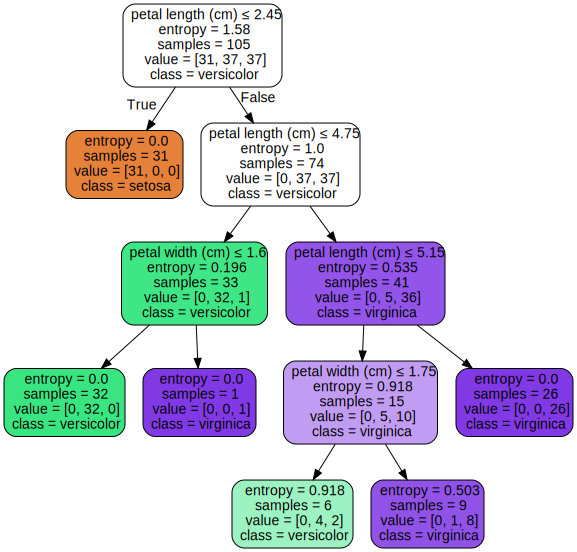

In [ ]:
# Экспорт дерева в формате dot
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Визуализация дерева
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # Сохранение в файл
graph


### 6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

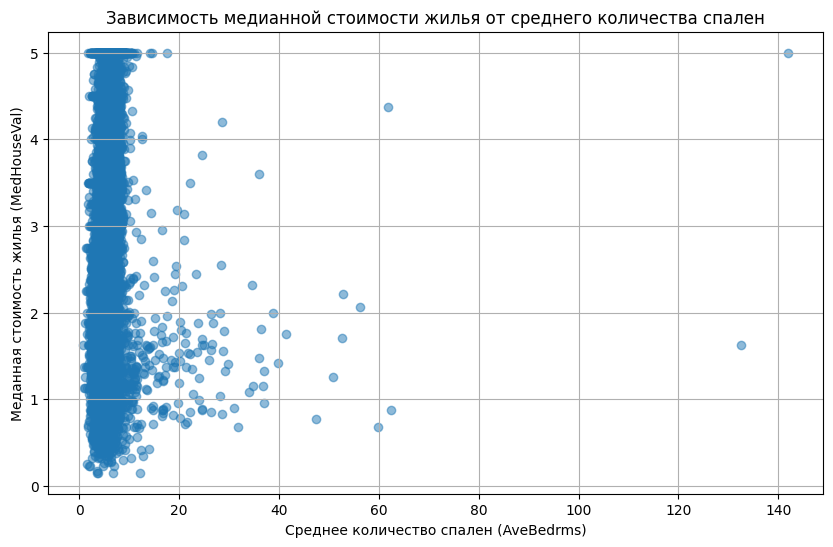

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загружаем данные
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.frame

# Извлекаем только нужные столбцы
X = data[['AveRooms']]
y = data['MedHouseVal']

# Строим диаграмму рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.title('Зависимость медианной стоимости жилья от среднего количества спален')
plt.xlabel('Среднее количество спален (AveBedrms)')
plt.ylabel('Меданная стоимость жилья (MedHouseVal)')
plt.grid(True)
plt.show()


### 7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Генерация данных для регрессии
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создание модели регрессионного дерева
model = DecisionTreeRegressor(random_state=0)

# Обучение модели
model.fit(X_train, y_train)

# Оценка модели на тестовой выборке
score = model.score(X_test, y_test)
print(f'R^2 score на тестовой выборке: {score:.2f}')


R^2 score на тестовой выборке: 0.99


### 8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

In [ ]:
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.datasets import make_regression
    from sklearn.tree import plot_tree


In [ ]:
    # Генерация случайных данных для регрессии
    X, y = make_regression(n_samples=100, n_features=1, noise=0.1)


In [ ]:
    # Создание модели дерева решений
    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, y)


DecisionTreeRegressor(max_depth=3)

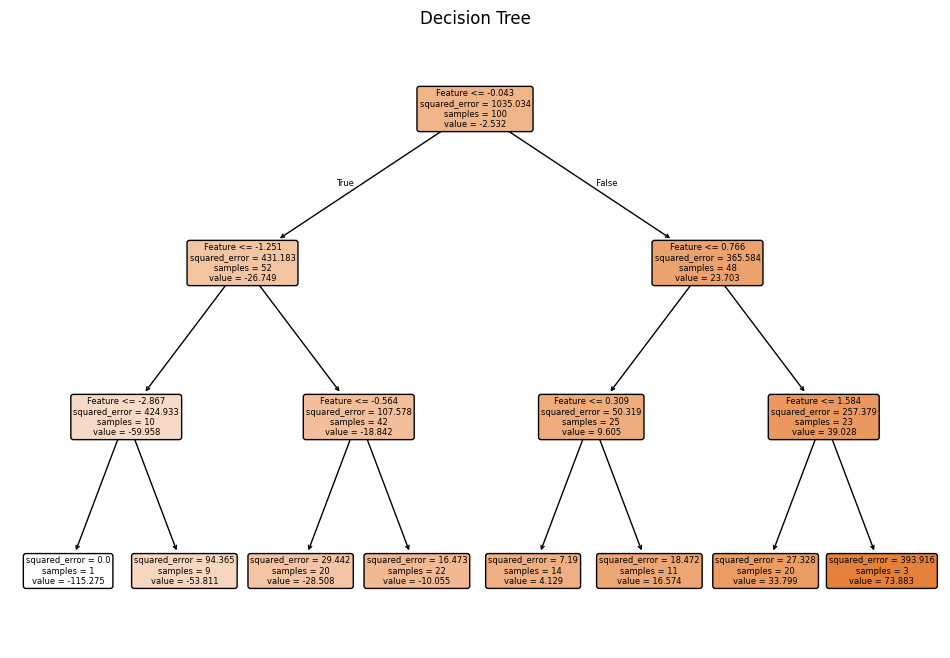

In [ ]:
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=['Feature'], rounded=True)
    plt.title('Decision Tree')
    plt.show()


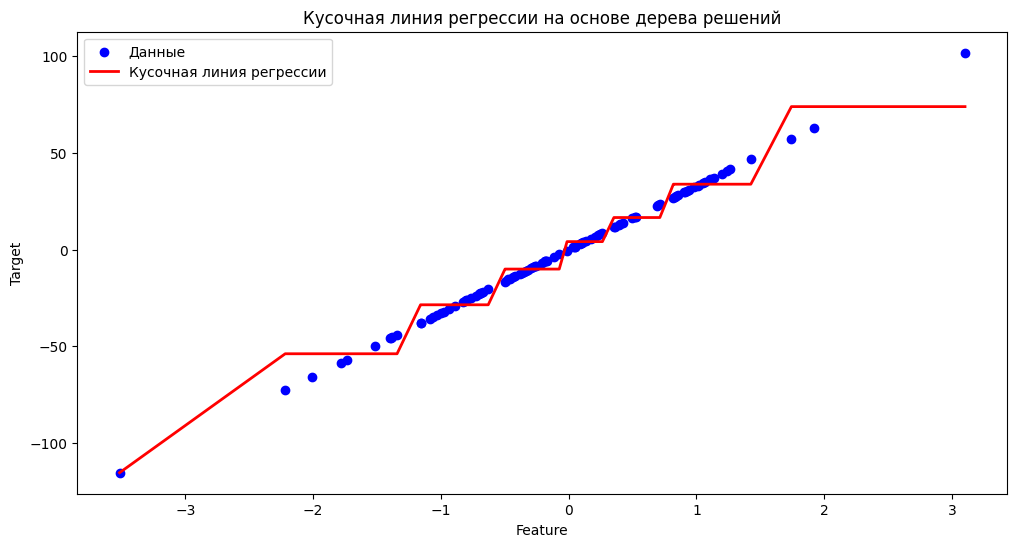

In [ ]:
    # Предсказание на основе модели
    X_test = np.sort(X, axis=0)
    y_pred = model.predict(X_test)

    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, color='blue', label='Данные')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Кусочная линия регрессии')
    plt.title('Кусочная линия регрессии на основе дерева решений')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()


### 9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

Чтобы оценить качество работы модели, необходимо учитывать несколько ключевых аспектов:

1. Точность предсказаний: Как добре модель предсказала результаты на тестовых данных? Этот показатель часто измеряется с помощью метрик, таких как точность, полнота, F-мера, и так далее.

2. Обобщающая способность: Насколько хорошо модель работает на новых, ранее невидимых данных? Это можно оценить, проверяя предсказания на валидационном наборе данных.

3. Проверка на переобучение: Нужно убедиться в том, что модель не слишком сильно подстроилась под обучающие данные. Это можно сделать, сравнив производительность на обучающих и тестовых данных.

4. Интерпретируемость: Насколько легко понять, как модель пришла к своим предсказаниям? Это может быть важным аспектом, особенно в некоторых областях, таких как медицина или финансы.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# Пример обучающих данных
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.array([1.5, 1.7, 2.1, 2.5])

# Создание и обучение модели регрессионного дерева
model = DecisionTreeRegressor()
model.fit(X, y)


DecisionTreeRegressor()

In [ ]:
# Новое наблюдение (например, характеристика [1.5, 2.5])
new_observation = np.array([[1.5, 2.5]])


In [ ]:
# Предсказание для нового наблюдения
prediction = model.predict(new_observation)
print(f'Предсказанное значение: {prediction[0]}')


Предсказанное значение: 1.7


### 10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, r2_score
import graphviz

# 1. Загрузка датасета
housing_data = fetch_california_housing()
X = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
y = pd.Series(housing_data.target)

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Обучение модели дерева решений
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 4. Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# 5. Оценка качества работы модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Средняя абсолютная ошибка: {mae:.2f}")
print(f"Коэффициент детерминации R^2: {r2:.2f}")

# 6. Визуализация дерева решений
dot_data = tree.export_graphviz(model, out_file=None,
                                 feature_names=X.columns,
                                 filled=True, rounded=True,
                                 special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Сохранение изображения дерева в файл
graph.view()  # Просмотр дерева

# Если хотите также отобразить дерево в интерфейсе Matplotlib:
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


Средняя абсолютная ошибка: 0.45
Коэффициент детерминации R^2: 0.62
